In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

In [23]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)

data_dir = pathlib.Path(data_dir)

In [10]:
data_dir_ = '/Users/fesusaron/.keras/datasets/flower_photos'

In [24]:
image_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=321,
    validation_split=0.2,
    subset='both',
    interpolation='bilinear',
    follow_links=False
)


Found 3444 files belonging to 5 classes.
Using 2756 files for training.
Using 688 files for validation.


In [129]:
image, label = next(iter(image_data))

plt.imshow(image[2].numpy()/255)
plt.show()

print(image[2])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model.fit(image_data[0], epochs=10, validation_data=image_data[1])

Epoch 1/10
90/90 [==============================] - 81s 875ms/step - loss: 9.6167 - accuracy: 0.6261 - val_loss: 12.9983 - val_accuracy: 0.4749
Epoch 2/10
90/90 [==============================] - 79s 866ms/step - loss: 3.6138 - accuracy: 0.7683 - val_loss: 13.3712 - val_accuracy: 0.4596
Epoch 3/10
90/90 [==============================] - 79s 864ms/step - loss: 2.3056 - accuracy: 0.8369 - val_loss: 12.1974 - val_accuracy: 0.4903
Epoch 4/10
90/90 [==============================] - 77s 853ms/step - loss: 1.2905 - accuracy: 0.8908 - val_loss: 12.8884 - val_accuracy: 0.4568
Epoch 5/10
90/90 [==============================] - 82s 902ms/step - loss: 0.7669 - accuracy: 0.9231 - val_loss: 11.9695 - val_accuracy: 0.4958
Epoch 6/10
90/90 [==============================] - 77s 847ms/step - loss: 0.8108 - accuracy: 0.9377 - val_loss: 11.5508 - val_accuracy: 0.4889
Epoch 7/10
90/90 [==============================] - 76s 844ms/step - loss: 0.5698 - accuracy: 0.9603 - val_loss: 14.9905 - val_accuracy:

In [3]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV3Large

2023-01-16 13:33:51.217200: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
base_model = MobileNetV3Small(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

2023-01-16 13:34:02.651322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [119]:
modelV3 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])

modelV3.layers[0].trainable = False

In [ ]:
modelV3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_8   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_21 (Dense)            (None, 64)                36928     
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 5)                 325       
                                                     

In [ ]:
modelV3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
historyV3 = modelV3.fit(image_data[0], epochs=10, validation_data=image_data[1])

Epoch 1/10
90/90 [==============================] - 135s 1s/step - loss: 0.5456 - accuracy: 0.8042 - val_loss: 0.9888 - val_accuracy: 0.7103
Epoch 2/10
90/90 [==============================] - 111s 1s/step - loss: 0.1862 - accuracy: 0.9360 - val_loss: 1.0355 - val_accuracy: 0.7465
Epoch 3/10
90/90 [==============================] - 112s 1s/step - loss: 0.1094 - accuracy: 0.9614 - val_loss: 0.7419 - val_accuracy: 0.8175
Epoch 4/10
90/90 [==============================] - 115s 1s/step - loss: 0.0666 - accuracy: 0.9746 - val_loss: 0.7983 - val_accuracy: 0.8175
Epoch 5/10
90/90 [==============================] - 116s 1s/step - loss: 0.0798 - accuracy: 0.9729 - val_loss: 0.6635 - val_accuracy: 0.8412
Epoch 6/10
90/90 [==============================] - 113s 1s/step - loss: 0.0684 - accuracy: 0.9774 - val_loss: 1.1039 - val_accuracy: 0.8008
Epoch 7/10
90/90 [==============================] - 113s 1s/step - loss: 0.0546 - accuracy: 0.9819 - val_loss: 1.1870 - val_accuracy: 0.8036
Epoch 8/10
90

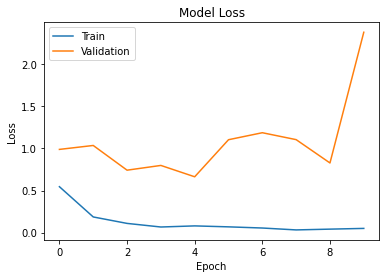

In [ ]:
plt.plot(historyV3.history['loss'])
plt.plot(historyV3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

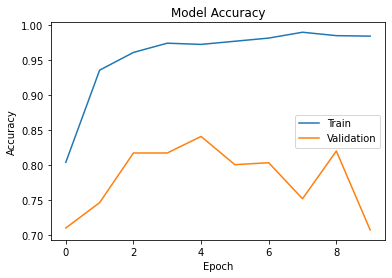

In [ ]:
plt.plot(historyV3.history['accuracy'])
plt.plot(historyV3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [11]:
#Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
train_gen = data_generator.flow_from_directory(
        data_dir_,
        target_size=(224, 224),
        batch_size=32,
        seed=111,
        subset='training')

Found 2758 images belonging to 5 classes.


In [13]:
val_gen = data_generator.flow_from_directory(
        data_dir_,
        target_size=(224, 224),
        batch_size=32,
        seed=111,
        subset='validation')

Found 686 images belonging to 5 classes.


In [120]:
modelV3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [122]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='/Users/fesusaron/Desktop/ML/log', histogram_freq=1)

In [123]:
historyV3_aug = modelV3.fit(train_gen, epochs=10, validation_data=val_gen, callbacks=tb_callback)

Epoch 1/10
87/87 [==============================] - 103s 1s/step - loss: 1.5050 - accuracy: 0.4141 - val_loss: 1.1187 - val_accuracy: 0.5714
Epoch 2/10
87/87 [==============================] - 90s 1s/step - loss: 0.9342 - accuracy: 0.6577 - val_loss: 0.8215 - val_accuracy: 0.7114
Epoch 3/10
87/87 [==============================] - 83s 957ms/step - loss: 0.7469 - accuracy: 0.7237 - val_loss: 0.6976 - val_accuracy: 0.7522
Epoch 4/10
87/87 [==============================] - 82s 941ms/step - loss: 0.6381 - accuracy: 0.7770 - val_loss: 0.6335 - val_accuracy: 0.7653
Epoch 5/10
87/87 [==============================] - 79s 912ms/step - loss: 0.5800 - accuracy: 0.7901 - val_loss: 0.5726 - val_accuracy: 0.7945
Epoch 6/10
87/87 [==============================] - 91s 1s/step - loss: 0.5446 - accuracy: 0.8035 - val_loss: 0.5457 - val_accuracy: 0.8134
Epoch 7/10
87/87 [==============================] - 79s 914ms/step - loss: 0.4870 - accuracy: 0.8314 - val_loss: 0.4877 - val_accuracy: 0.8149
Epoch 8

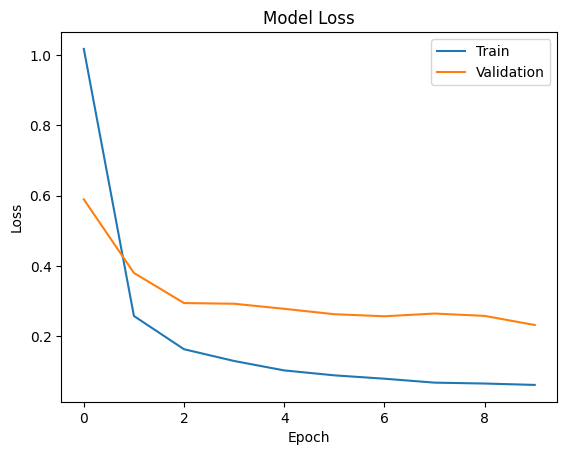

In [ ]:
plt.plot(historyV3_aug.history['loss'])
plt.plot(historyV3_aug.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

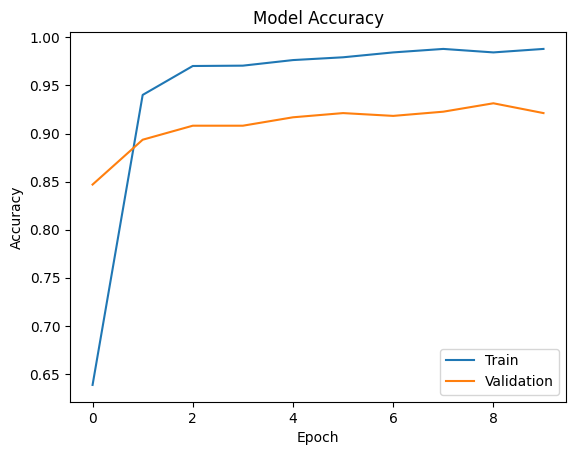

In [ ]:
plt.plot(historyV3_aug.history['accuracy'])
plt.plot(historyV3_aug.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [14]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
)

In [ ]:
tf.random.set_seed(42)

In [15]:
modelVGG = tf.keras.Sequential([
    vgg16,
    tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])

modelVGG.layers[0].trainable = False

In [16]:
modelVGG.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 14,748,101
Trainable params: 33,285
Non-

In [18]:
modelVGG.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
historyVGG = modelVGG.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
16/87 [====>.........................] - ETA: 9:51 - loss: 2.0035 - accuracy: 0.2520 

KeyboardInterrupt: 

In [106]:
test_l,test_r = tf.keras.utils.split_dataset(image_data[0], left_size=0.9)

In [107]:
test_r = test_r.unbatch()


In [108]:
imgs = []
lbls = []
for img, label in test_r:
    imgs.append(tf.keras.utils.img_to_array(img, data_format=None, dtype=None))
    lbls.append(label.numpy())

In [109]:
imgs_s = np.stack(imgs)
lable_s = np.stack(lbls)

In [125]:
preds = modelV3.predict(imgs_s)

9/9 [==============================] - 6s 361ms/step


In [59]:
preds.shape

(276, 5)

In [126]:
preds_max = np.argmax(preds, axis=1)

In [86]:
l_max = np.argmax(lable_s)

In [111]:
from sklearn.metrics import confusion_matrix

In [127]:
cf_matrix = confusion_matrix(lable_s, preds_max)
print(cf_matrix)

[[46  2  0  0  1]
 [ 3 64  0  3  1]
 [ 0  1 31  1  5]
 [ 0  5  1 51  0]
 [ 2  0  2  2 55]]


<AxesSubplot:>

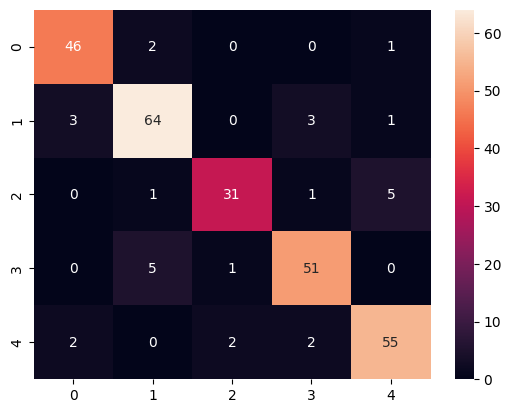

In [128]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [132]:
from keras.models import Model

pca_model = Model(inputs=modelV3.input, outputs=modelV3.layers[-2].output)

In [133]:
pred_pca = pca_model.predict(imgs_s)

9/9 [==============================] - 8s 474ms/step


In [148]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_output = pca.fit_transform(pred_pca)

In [146]:
color_list = ['blue', 'green', 'yellow', 'brown', 'black', 'cyan', 'orange', 'olive', 'purple', 'pink']
color_map = {i: color_list[i] for i in range(5)}

colors = [color_map[y] for y in lable_s]

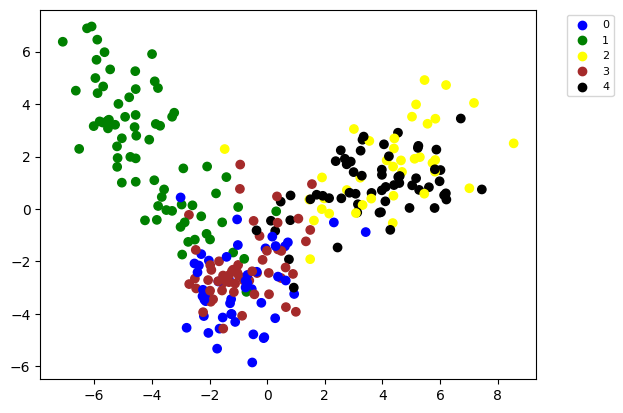

In [147]:
scatter = plt.scatter(pca_output[:, 0], pca_output[:, 1], c=colors)

for i in range(5):
    plt.scatter([], [], c=color_map[i], label=str(i))
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.show()